<a href="https://colab.research.google.com/github/NattachaiJairak/Week3-deploy-ml-model/blob/main/ml_6610422021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Data head:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no     

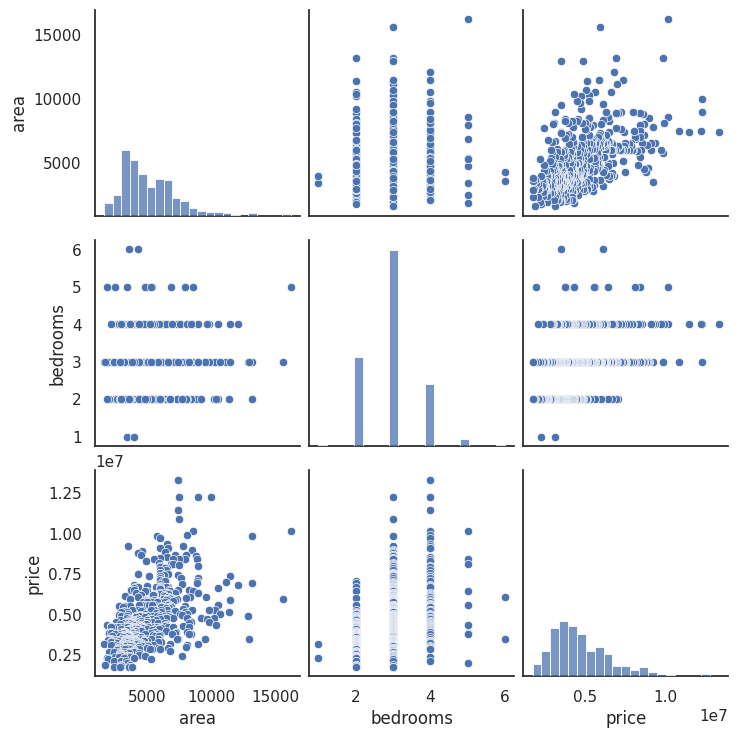


Train

Coefficients:
Intercept (theta0): -403253.4973792471
Coefficients (theta1, theta2,...): [ 0.00000000e+00  5.53135078e+02  1.02597250e+06 -4.86250817e-02
  1.56783728e+02 -1.80417520e+05]
Predict
[7144110.86883692]
Deploy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Replace the URL with the raw link to the CSV file on GitHub
url = "https://raw.githubusercontent.com/NattachaiJairak/Week3-deploy-ml-model/main/Housing.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(url)

# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Display the first few rows of the dataset
print("\nData head:")
print(data.head())

# Display the shape of the dataset
print("\nData shape:")
print(data.shape)

# Display information about the dataset
print("\nData info:")
print(data.info())

# Display summary statistics of the dataset
print("\nData describe:")
print(data.describe())

# Extract features and target variable
X = data.iloc[:, 1:3]
y = data["price"]

# Split data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the data (optional)
sns.pairplot(data[['area', 'bedrooms', 'price']])
plt.show()

# Create polynomial features
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train model on the training set
print("\nTrain")
polyreg.fit(X_train, y_train)

# Display coefficients
print("\nCoefficients:")
print("Intercept (theta0):", polyreg.named_steps['linearregression'].intercept_)
print("Coefficients (theta1, theta2,...):", polyreg.named_steps['linearregression'].coef_)

"""Predict"""
print("Predict")
X_test = pd.DataFrame({
    "area": [8000],
    "bedrooms": [4]
})

result = polyreg.predict(X_test)
print(result)

"""Deploy"""
print("Deploy")
pickle.dump(polyreg, open('ml_6610422021.sav', 'wb'))
# Depending on your deployment scenario, you may not need the following line
from google.colab import files
files.download('ml_6610422021.sav')

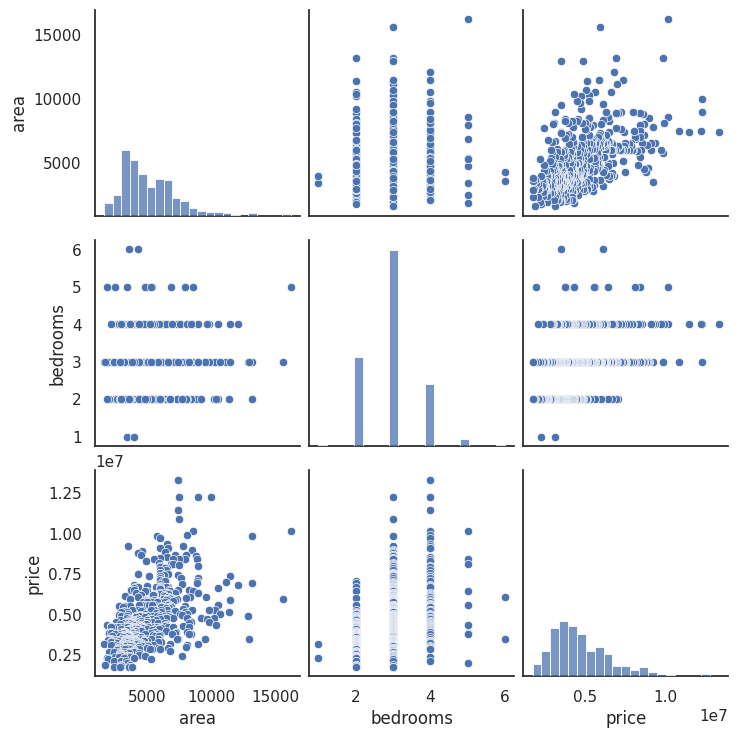


Train

Coefficients:
Intercept (theta0): -403253.4973792471
Coefficients (theta1, theta2,...): [ 0.00000000e+00  5.53135078e+02  1.02597250e+06 -4.86250817e-02
  1.56783728e+02 -1.80417520e+05]

Mean Squared Error: 3096939337996.5024


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error  # Import mean_squared_error

# Split data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the data (optional)
sns.pairplot(data[['area', 'bedrooms', 'price']])
plt.show()

# Create polynomial features
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train model on the training set
print("\nTrain")
polyreg.fit(X_train, y_train)

# Display coefficients
print("\nCoefficients:")
print("Intercept (theta0):", polyreg.named_steps['linearregression'].intercept_)
print("Coefficients (theta1, theta2,...):", polyreg.named_steps['linearregression'].coef_)

# Predict on the entire test set
y_pred = polyreg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)

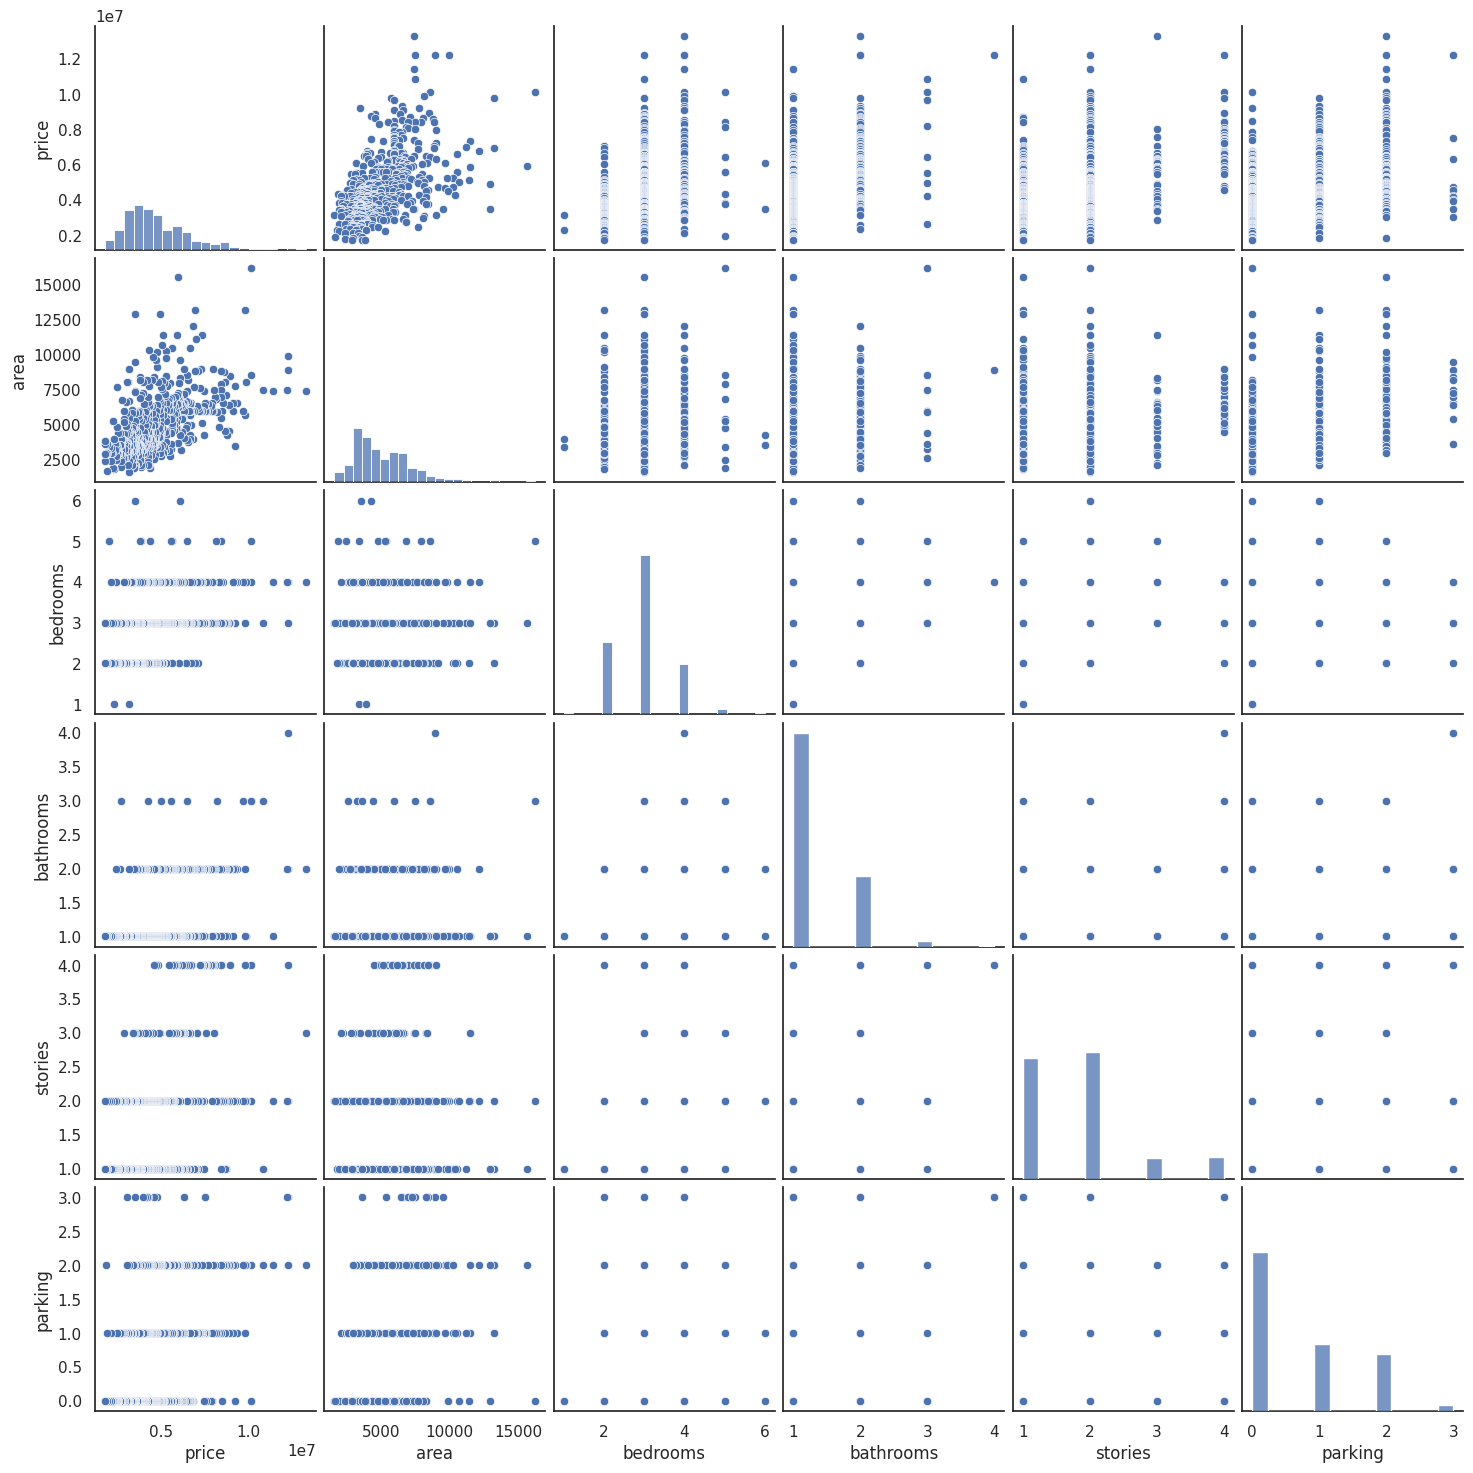

In [21]:
sns.pairplot(data)

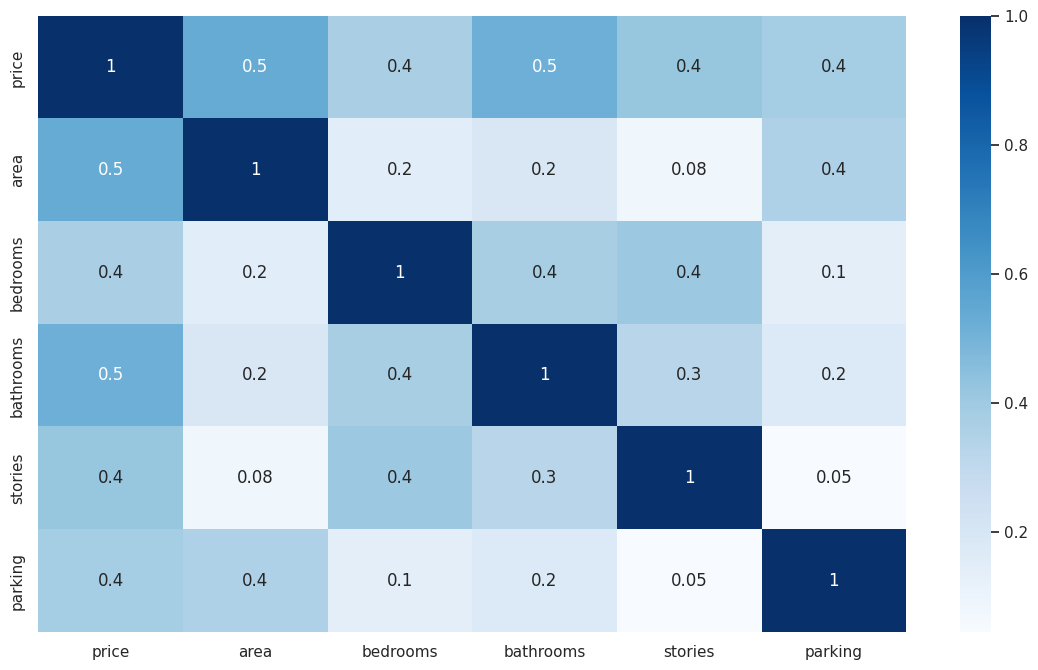

In [22]:
# Calculate and display correlation matrix
plt.figure(figsize=(14, 8))
sns.set_theme(style="white")
corr = data.corr(numeric_only=True)
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaler.fit(X) #calculate mu, sd
print(scaler.mean_)
#print(scaler.transform(X))
Xs = scaler.transform(X)
print(Xs)
#print(scaler.transform([[2, 2]]))

mscaler = MinMaxScaler()
mscaler.fit_transform(X) #calculate mu, sd
#print(scaler.transform(X))
#Xs = mscaler.transform(X)
print(Xs)
#print(scaler.transform([[2, 2]]))

[5.15054128e+03 2.96513761e+00]
[[ 1.04672629  1.40341936]
 [ 1.75700953  1.40341936]
 [ 2.21823241  0.04727831]
 ...
 [-0.70592066 -1.30886273]
 [-1.03338891  0.04727831]
 [-0.5998394   0.04727831]]
[[ 1.04672629  1.40341936]
 [ 1.75700953  1.40341936]
 [ 2.21823241  0.04727831]
 ...
 [-0.70592066 -1.30886273]
 [-1.03338891  0.04727831]
 [-0.5998394   0.04727831]]


In [24]:
print(Xs[0:5])

[[1.04672629 1.40341936]
 [1.75700953 1.40341936]
 [2.21823241 0.04727831]
 [1.08362412 1.40341936]
 [1.04672629 1.40341936]]


In [25]:
polyreg.fit(Xs,y)
print(polyreg.named_steps['linearregression'].intercept_) #theta0
print(polyreg.named_steps['linearregression'].coef_) #theta1, theta2,...

5077504.941730271
[      0.         1161603.12356709  606660.32757403 -218979.05267827
  236380.51062711 -127693.02770875]


In [26]:
print(X_test)

     area  bedrooms
316  5900         4
77   6500         3
360  4040         2
90   5000         3
493  3960         3
..    ...       ...
15   6000         4
357  6930         4
39   6000         4
54   6000         3
155  6100         3

[109 rows x 2 columns]


In [27]:
x_test_s = scaler.transform(X_test)
print(x_test_s)

[[ 0.34566751  1.40341936]
 [ 0.62240124  0.04727831]
 [-0.51220705 -1.30886273]
 [-0.06943308  0.04727831]
 [-0.54910488  0.04727831]
 [ 0.72387027  0.04727831]
 [ 1.55407146  0.04727831]
 [-0.07404531  1.40341936]
 [-0.88118536 -1.30886273]
 [-1.13024571  0.04727831]
 [ 1.58174483  1.40341936]
 [-0.56109668 -1.30886273]
 [-0.65979837 -1.30886273]
 [-0.94575656  0.04727831]
 [-0.54449265  0.04727831]
 [-0.70130843  0.04727831]
 [-1.45310173 -1.30886273]
 [ 0.3917898   0.04727831]
 [ 0.32260636  0.04727831]
 [ 0.3917898  -1.30886273]
 [-0.06020863  0.04727831]
 [ 0.77229867  0.04727831]
 [-0.6925452  -1.30886273]
 [-0.62290054  0.04727831]
 [ 1.42954128  0.04727831]
 [ 2.21823241  0.04727831]
 [-0.95036879 -1.30886273]
 [-0.99187885  0.04727831]
 [ 3.71259454  0.04727831]
 [-0.99187885 -1.30886273]
 [-0.53065597  0.04727831]
 [-0.9365321   0.04727831]
 [ 0.3917898   0.04727831]
 [ 0.67544187  0.04727831]
 [-0.17320823  1.40341936]
 [-0.25392224  0.04727831]
 [-0.23270599  0.04727831]
 

In [28]:
print(result)

[7144110.86883692]


In [29]:
# Train model on the training set
print("\nTrain")
polyreg.fit(X_train, y_train)


Train


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [30]:
# Predict on the test set
print("\nPredict")
y_pred = polyreg.predict(X_test)
print(y_pred)


Predict
[6084910.02029797 5649157.31957923 3634860.52229301 4952710.58342962
 4341392.83066629 5732903.10998296 6241295.14366169 5492734.02477014
 3224690.97000157 3459842.37433634 7361069.22865187 3584090.11212126
 3478261.51391863 3756426.69014942 4347771.72432236 4125433.60585405
 2465926.1573956  5441320.94835681 5374229.09152874 4376733.68368666
 4963435.8423286  5771213.36085509 3442166.22804374 4238007.92994803
 6185123.35984152 6421143.58963555 3140855.10481111 3683739.36364579
 6088490.75492708 3089503.28393308 4366850.05519261 3770847.45525417
 5441320.94835681 5693520.67606035 5341063.11991576 4730036.39173199
 4756435.73460689 4075498.46023334 4023769.31596933 3725679.67745166
 6121862.03911607 3432423.77730027 5617537.30292725 4491802.17390479
 4561783.24147064 4343522.43816216 5441320.94835681 5243530.36548039
 4752949.96568588 3089503.28393308 5984509.297908   3089503.28393308
 4725662.91763708 4671936.58972484 4465876.05013271 3617489.28089623
 5328285.55993531 3227192